In [11]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2


image 1/1 D:\cvvvv\segmentation\urnpublicidap.org2f063819764ae42cd4c8ffd5c76e4c6dSouth_Africa-Road_Accident_Scam_96947.webp: 448x640 9 persons, 3 cars, 64.8ms
Speed: 3.0ms preprocess, 64.8ms inference, 10.0ms postprocess per image at shape (1, 3, 448, 640)


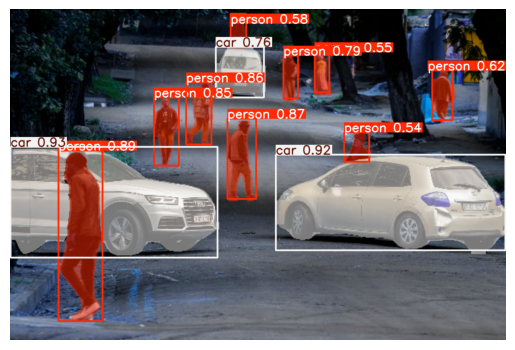

In [12]:
model = YOLO("D:\cvvvv\segmentation\yolov8n-seg.pt")
results = model("D:/cvvvv/segmentation/urnpublicidap.org2f063819764ae42cd4c8ffd5c76e4c6dSouth_Africa-Road_Accident_Scam_96947.webp")
result_img = results[0].plot()
plt.imshow(result_img)
plt.axis('off')
plt.show()

In [ ]:
from ultralytics import YOLO

model = YOLO("D:\\cvvvv\\segmentation\\yolov8n-seg.pt")

cap = cv2.VideoCapture("D:\\cvvvv\\segmentation\\dodge.mp4.mp4")

# Output video settings
out = cv2.VideoWriter("output_segment_Video.mp4",
                      cv2.VideoWriter_fourcc(*"mp4v"),
                      cap.get(cv2.CAP_PROP_FPS),
                      (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
                       int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))
                      

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    result_img = model(frame)[0].plot()
    out.write(result_img)
    cv2.imshow("Processed Frame", result_img)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()